## Analise Preditiva dos dados dos pacientes para prever possiveis problemas bucais no futuro.

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv('/content/dados_odontologicos.csv')

print(dados.head())

   list_number  idade  frequencia_escovacao uso_fio_dental uso_enx_bucal  \
0            1     97                    10            Sim           Não   
1            2     36                     4            Sim           Não   
2            3     73                     3            Não           Sim   
3            4     97                     1            Sim           Sim   
4            5     22                     2            Sim           Não   

  fumante historico_problemas hist_prob_familiar  genero  tempo_escovação  \
0     Não               Carie                Não    Male                2   
1     Não               Carie                Não  Female                8   
2     Sim               Carie                Não  Female                3   
3     Sim           Gengivite                Não  Female                7   
4     Sim               Canal                Não    Male                3   

  consumo_acucar_dia  visitas_ao_dentista uso_alcool problema_bucal  
0         

In [3]:
# Converter as colunas em variáveis numéricas
label_encoder = LabelEncoder()

dados['consumo_acucar_dia'] = label_encoder.fit_transform(dados['consumo_acucar_dia'])
dados['uso_alcool'] = label_encoder.fit_transform(dados['uso_alcool'])
dados['historico_problemas'] = label_encoder.fit_transform(dados['historico_problemas'])
dados['uso_fio_dental'] = label_encoder.fit_transform(dados['uso_fio_dental'])
dados['uso_enx_bucal'] = label_encoder.fit_transform(dados['uso_enx_bucal'])
dados['frequencia_escovacao'] = label_encoder.fit_transform(dados['frequencia_escovacao'])
dados['fumante'] = label_encoder.fit_transform(dados['fumante'])
dados['hist_prob_familiar'] = label_encoder.fit_transform(dados['hist_prob_familiar'])
dados['genero'] = label_encoder.fit_transform(dados['genero'])


In [4]:
# Aplicando o LabelEncoder na variável alvo 'problema_bucal'
dados['problema_bucal_encoded'] = label_encoder.fit_transform(dados['problema_bucal'])

print(dados[['problema_bucal', 'problema_bucal_encoded']])


    problema_bucal  problema_bucal_encoded
0         Saudável                       4
1            Cárie                       0
2         Saudável                       4
3     Periodontite                       3
4           Outros                       2
..             ...                     ...
995      Gengivite                       1
996   Periodontite                       3
997         Outros                       2
998       Saudável                       4
999          Cárie                       0

[1000 rows x 2 columns]


In [5]:
print(dados.head())

   list_number  idade  frequencia_escovacao  uso_fio_dental  uso_enx_bucal  \
0            1     97                     9               1              0   
1            2     36                     3               1              0   
2            3     73                     2               0              1   
3            4     97                     0               1              1   
4            5     22                     1               1              0   

   fumante  historico_problemas  hist_prob_familiar  genero  tempo_escovação  \
0        0                    1                   0       1                2   
1        0                    1                   0       0                8   
2        1                    1                   0       0                3   
3        1                    2                   0       0                7   
4        1                    0                   0       1                3   

   consumo_acucar_dia  visitas_ao_dentista  uso_al

### Algumas possiveis analises exploratorias para entender melhor os números e os dados.

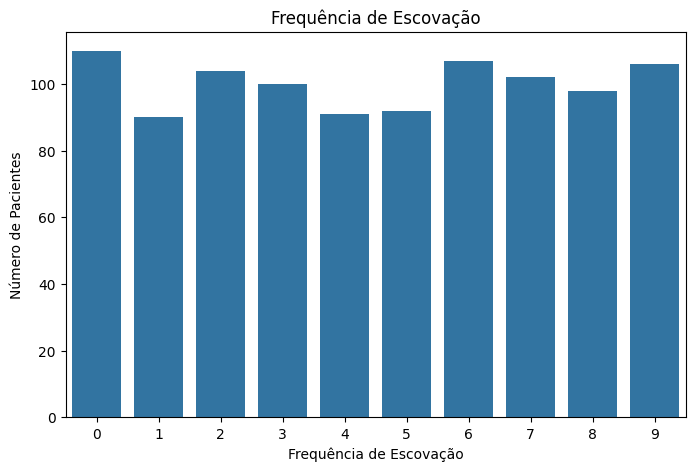

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(x='frequencia_escovacao', data=dados)
plt.title('Frequência de Escovação')
plt.xlabel('Frequência de Escovação')
plt.ylabel('Número de Pacientes')
plt.show()


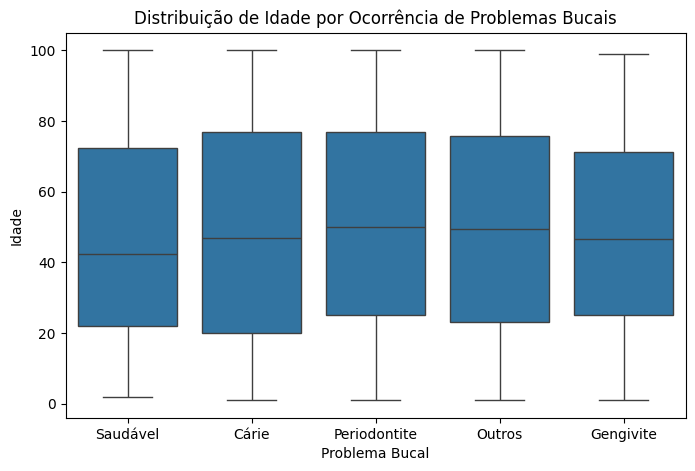

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='problema_bucal', y='idade', data=dados)
plt.title('Distribuição de Idade por Ocorrência de Problemas Bucais')
plt.xlabel('Problema Bucal')
plt.ylabel('Idade')
plt.show()

## Inicio dos treinos e modelos preditivos

In [8]:
dados = dados.drop(columns=['list_number'])


In [9]:
X = dados.drop(columns=['problema_bucal', 'problema_bucal_encoded']) # features
y = dados['problema_bucal_encoded'] # target

In [10]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Testando Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(f'Acurácia Random Forest: {accuracy_score(y_test, y_pred_rf):.2f}')

# Testando Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print(f'Acurácia Gradient Boosting: {accuracy_score(y_test, y_pred_gb):.2f}')



Acurácia Random Forest: 0.23
Acurácia Gradient Boosting: 0.21


# Fazer as análises individualmente para cada paciente

In [12]:
import joblib

joblib.dump(rf_model, 'modelo_problema_bucal.pkl')


['modelo_problema_bucal.pkl']

In [13]:
modelo = joblib.load('modelo_problema_bucal.pkl')


In [14]:
# Exemplo de dados individuais do paciente
dados_paciente = {
    'idade': 30,
    'frequencia_escovacao': 2,
    'uso_fio_dental': 1,
    'uso_enx_bucal': 1,
    'fumante': 1,
    'historico_problemas': 1,
    'hist_prob_familiar': 1,
    'genero': 1,
    'tempo_escovação': 1,
    'consumo_acucar_dia': 1,
    'visitas_ao_dentista': 1,
    'uso_alcool': 1
}


In [15]:
dados_paciente_df = pd.DataFrame([dados_paciente])


In [16]:

previsao_problema_bucal = modelo.predict(dados_paciente_df)
probabilidade_problema_bucal = modelo.predict_proba(dados_paciente_df)

if previsao_problema_bucal[0] == 1:
    print("Alerta: Alta probabilidade de desenvolver problemas bucais.")
else:
    print("Baixa probabilidade de problemas bucais.")

print(f"Probabilidade de problemas bucais: {probabilidade_problema_bucal[0][1] * 100:.2f}%")


Baixa probabilidade de problemas bucais.
Probabilidade de problemas bucais: 12.00%


## E queremos saber a importância das features para entender quais fatores (como idade, uso de fio dental, etc.) estão afetando mais o risco para um paciente específico.

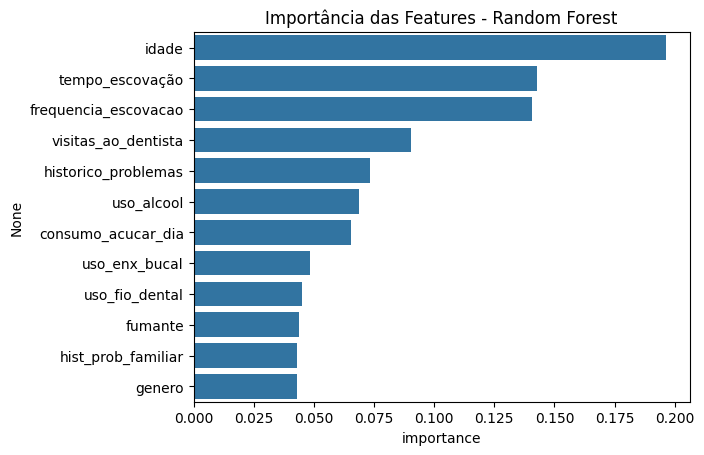

In [17]:
feature_importances = pd.DataFrame(modelo.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
sns.barplot(x='importance', y=feature_importances.index, data=feature_importances)
plt.title('Importância das Features - Random Forest')
plt.show()


Após a previsão, o sistema pode exibir as probabilidades e destacar as principais variáveis que contribuíram para o risco. Isso pode ser integrado em um portal administrativo, onde dentistas acessariam as previsões para orientar os pacientes

In [18]:
pip install streamlit pandas numpy matplotlib seaborn joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


In [19]:
import joblib

In [20]:
joblib.dump(modelo, 'modelo_problema_bucal.pkl')

['modelo_problema_bucal.pkl']